In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [3]:
# CH9L = pd.read_csv('./magazine/final/CH9L_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [4]:
# CH9L['ADFN_2'] = CH9L['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [5]:
# CH9L['ADFN_2']

0                          [메탈, 레진, 귀고리, CHANEL, CHANEL]
1      [스티치, 디테일, 코튼, 원피스, 로우, 클래식, LOW, CLASSIC, 헤어,...
2      [CHANEL, 케이스, 백, 화이트, 실버, 조합, 시원하고, 세련, CHANEL...
3                               [CHANEL, 블, 리마, 브림, 미스트]
4      [화려하기보다, 사려, 깊은, 미적, 감각, CHANEL, 할펀, 치어스, 아름답다...
                             ...                        
354    [밀란, 패션위크, 참석, 차, 출국, 리사, 공항, BLACKPINK, 리사, 오...
355    [리사, 패션, 브랜드, 탄생, 할, 보인다, YG, 엔터테인먼트, BLACKPIN...
356    [서로, 팬임, 인증, 두, 스타, BLACKPINK, 세레나, 고메즈, 함께한, ...
357    [내셔널, 아이스크림, 데이, 기념, BLACKPINK, 귀여운, 포스팅, 제니, ...
358    [한국, 신진, 디자이너, 하이, 패션, 브랜드, 섭렵, 블핑, BLACKPINK,...
Name: ADFN_2, Length: 359, dtype: object

In [36]:
# CH8L = pd.read_csv('./magazine/final/CH8L_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [37]:
# CH8L['ADFN_2'] = CH8L['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [38]:
# CH8L['ADFN_2']

0                          [메탈, 레진, 귀고리, CHANEL, CHANEL]
1      [빈티지, 한, 체크, 무늬, 재킷, CELINE, CELINE, 비비드, 핑크, ...
2                    [브랜드, 로고, 장식, 서프보드, CHANEL, CHANEL]
3      [간, 얼루어, 그린, 이슈, 얼루어, 그린, 캠페인, 진행, 많은, 부분, 많은,...
4      [포켓, 장식, 패딩, 머플러, 라벤헴, LAVENHAM, 하얀색, 장갑, CHAN...
                             ...                        
374    [밀란, 패션위크, 참석, 차, 출국, 리사, 공항, BLACKPINK, 리사, 오...
375    [리사, 패션, 브랜드, 탄생, 할, 보인다, YG, 엔터테인먼트, BLACKPIN...
376    [서로, 팬임, 인증, 두, 스타, BLACKPINK, 세레나, 고메즈, 함께한, ...
377    [내셔널, 아이스크림, 데이, 기념, BLACKPINK, 귀여운, 포스팅, 제니, ...
378    [한국, 신진, 디자이너, 하이, 패션, 브랜드, 섭렵, 블핑, BLACKPINK,...
Name: ADFN_2, Length: 379, dtype: object

In [62]:
CH7L = pd.read_csv('./magazine/final/CH7L_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [63]:
CH7L['ADFN_2'] = CH7L['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [64]:
CH7L['ADFN_2']

0                          [메탈, 레진, 귀고리, CHANEL, CHANEL]
1                    [복, 주머니, 형상, 체인, 백, CHANEL, CHANEL]
2      [국적, 플라워, 프린트, 셔츠, 겨, 자색, 핀, 스트라이프, 팬츠, 아크네, 스...
3      [리본, 장식, 드레스, 안, 레이어, 오렌지색, 스커트, 마르니, MARNI, 메...
4                       [로고, 진주, 장식, 뱅글, CHANEL, CHANEL]
                             ...                        
400    [밀란, 패션위크, 참석, 차, 출국, 리사, 공항, BLACKPINK, 리사, 오...
401    [리사, 패션, 브랜드, 탄생, 할, 보인다, YG, 엔터테인먼트, BLACKPIN...
402    [서로, 팬임, 인증, 두, 스타, BLACKPINK, 세레나, 고메즈, 함께한, ...
403    [내셔널, 아이스크림, 데이, 기념, BLACKPINK, 귀여운, 포스팅, 제니, ...
404    [한국, 신진, 디자이너, 하이, 패션, 브랜드, 섭렵, 블핑, BLACKPINK,...
Name: ADFN_2, Length: 405, dtype: object

### top50 리스트 생성

In [65]:
top500 = pd.read_csv('./CH7L_top500.csv', sep='|', encoding = 'utf-8')

In [66]:
top500

,word,count
0,리사,3573
1,CHANEL,769
2,예쁘다,677
3,귀엽다,543
4,춤,481
...,...,...
495,쟤,23
496,리액션,23
497,이어,23
498,엔터테인먼트,23


In [67]:
top30 = []
for i in range(30):
    top30.append(top500.loc[i, 'word'])
    
print(len(top30))
print(top30)

30
['리사', 'CHANEL', '예쁘다', '귀엽다', '춤', '사랑', '랩', '한국', '영어', '노래', '무대', '매력', '얼굴', '아이돌', '컬러', '브랜드', '태국', '룩', '블랙', '모델', '느낌', '중국', '한국어', '백', '한국인', '스타일', '패션', '표정', '쇼', '비율']


In [68]:
top50 = []
for i in range(50):
    top50.append(top500.loc[i, 'word'])
    
print(len(top50))
print(top50)

50
['리사', 'CHANEL', '예쁘다', '귀엽다', '춤', '사랑', '랩', '한국', '영어', '노래', '무대', '매력', '얼굴', '아이돌', '컬러', '브랜드', '태국', '룩', '블랙', '모델', '느낌', '중국', '한국어', '백', '한국인', '스타일', '패션', '표정', '쇼', '비율', '멋있다', '드레스', '실력', '여자', 'KARL', '눈', '외국인', '팬', '아이템', '최고', '머리', '장식', '옷', '재킷', '여성', '처음', '인기', '세계', '연습생', '호랑이']


### top100

In [69]:
top100 = []
for i in range(100):
    top100.append(top500.loc[i, 'word'])
    
print(len(top100))
print(top100)

100
['리사', 'CHANEL', '예쁘다', '귀엽다', '춤', '사랑', '랩', '한국', '영어', '노래', '무대', '매력', '얼굴', '아이돌', '컬러', '브랜드', '태국', '룩', '블랙', '모델', '느낌', '중국', '한국어', '백', '한국인', '스타일', '패션', '표정', '쇼', '비율', '멋있다', '드레스', '실력', '여자', 'KARL', '눈', '외국인', '팬', '아이템', '최고', '머리', '장식', '옷', '재킷', '여성', '처음', '인기', '세계', '연습생', '호랑이', '파리', '좋은', '골드', '봄', '새로운', '많은', '분위기', '예능', '코코', '완성', '다리', '클래식', '화이트', '가장', '팬츠', 'CELINE', '디자인', '프라다', '그룹', '영화', '프로', '앞머리', '스커트', '가방', '노력', '참석', '트위드', '영감', '스타', '단발', '시작', '여름', '크루즈', '걸그룹', '태국인', '컬렉션', '외국', '다양한', '핑크', '포인트', '인형', '카리스마', '좋다', 'YG', '세상', '화보', '대박', '짱', '스타일링', '링']


In [70]:
top200 = []
for i in range(200):
    top200.append(top500.loc[i, 'word'])
    
print(len(top200))
print(top200)

200
['리사', 'CHANEL', '예쁘다', '귀엽다', '춤', '사랑', '랩', '한국', '영어', '노래', '무대', '매력', '얼굴', '아이돌', '컬러', '브랜드', '태국', '룩', '블랙', '모델', '느낌', '중국', '한국어', '백', '한국인', '스타일', '패션', '표정', '쇼', '비율', '멋있다', '드레스', '실력', '여자', 'KARL', '눈', '외국인', '팬', '아이템', '최고', '머리', '장식', '옷', '재킷', '여성', '처음', '인기', '세계', '연습생', '호랑이', '파리', '좋은', '골드', '봄', '새로운', '많은', '분위기', '예능', '코코', '완성', '다리', '클래식', '화이트', '가장', '팬츠', 'CELINE', '디자인', '프라다', '그룹', '영화', '프로', '앞머리', '스커트', '가방', '노력', '참석', '트위드', '영감', '스타', '단발', '시작', '여름', '크루즈', '걸그룹', '태국인', '컬렉션', '외국', '다양한', '핑크', '포인트', '인형', '카리스마', '좋다', 'YG', '세상', '화보', '대박', '짱', '스타일링', '링', '데님', '쌤', '디자이너', '티셔츠', '한국말', '디렉터', '착용', '주얼리', '목소리', '간지', '선생님', '첫', '순간', '점', '해외', '라인', '프랑스', '촬영', '컴백', '미니', '음악', '우리나라', '손', '좋아요', '매치', '톱', '남자', '미쳤다', '연습', '패턴', '패션쇼', '마음', '메인', '마지막', '오늘', '콘서트', '성격', '한번', '메이크업', '럭셔리', '탑', '일본', '화장', '가죽', '부츠', '슈즈', '배', '친구', '춤선', '시크', '의상', '기억', '이미지', '자리', '미국', '젤', '방송', '레드', 'FW'

In [71]:
top300 = []
for i in range(300):
    top300.append(top500.loc[i, 'word'])
    
print(len(top300))
print(top300)

300
['리사', 'CHANEL', '예쁘다', '귀엽다', '춤', '사랑', '랩', '한국', '영어', '노래', '무대', '매력', '얼굴', '아이돌', '컬러', '브랜드', '태국', '룩', '블랙', '모델', '느낌', '중국', '한국어', '백', '한국인', '스타일', '패션', '표정', '쇼', '비율', '멋있다', '드레스', '실력', '여자', 'KARL', '눈', '외국인', '팬', '아이템', '최고', '머리', '장식', '옷', '재킷', '여성', '처음', '인기', '세계', '연습생', '호랑이', '파리', '좋은', '골드', '봄', '새로운', '많은', '분위기', '예능', '코코', '완성', '다리', '클래식', '화이트', '가장', '팬츠', 'CELINE', '디자인', '프라다', '그룹', '영화', '프로', '앞머리', '스커트', '가방', '노력', '참석', '트위드', '영감', '스타', '단발', '시작', '여름', '크루즈', '걸그룹', '태국인', '컬렉션', '외국', '다양한', '핑크', '포인트', '인형', '카리스마', '좋다', 'YG', '세상', '화보', '대박', '짱', '스타일링', '링', '데님', '쌤', '디자이너', '티셔츠', '한국말', '디렉터', '착용', '주얼리', '목소리', '간지', '선생님', '첫', '순간', '점', '해외', '라인', '프랑스', '촬영', '컴백', '미니', '음악', '우리나라', '손', '좋아요', '매치', '톱', '남자', '미쳤다', '연습', '패턴', '패션쇼', '마음', '메인', '마지막', '오늘', '콘서트', '성격', '한번', '메이크업', '럭셔리', '탑', '일본', '화장', '가죽', '부츠', '슈즈', '배', '친구', '춤선', '시크', '의상', '기억', '이미지', '자리', '미국', '젤', '방송', '레드', 'FW'

In [72]:
t500 = []
for i in range(500):
    t500.append(top500.loc[i, 'word'])
    
print(len(t500))
print(t500[:91])

500
['리사', 'CHANEL', '예쁘다', '귀엽다', '춤', '사랑', '랩', '한국', '영어', '노래', '무대', '매력', '얼굴', '아이돌', '컬러', '브랜드', '태국', '룩', '블랙', '모델', '느낌', '중국', '한국어', '백', '한국인', '스타일', '패션', '표정', '쇼', '비율', '멋있다', '드레스', '실력', '여자', 'KARL', '눈', '외국인', '팬', '아이템', '최고', '머리', '장식', '옷', '재킷', '여성', '처음', '인기', '세계', '연습생', '호랑이', '파리', '좋은', '골드', '봄', '새로운', '많은', '분위기', '예능', '코코', '완성', '다리', '클래식', '화이트', '가장', '팬츠', 'CELINE', '디자인', '프라다', '그룹', '영화', '프로', '앞머리', '스커트', '가방', '노력', '참석', '트위드', '영감', '스타', '단발', '시작', '여름', '크루즈', '걸그룹', '태국인', '컬렉션', '외국', '다양한', '핑크', '포인트', '인형']


### top50만 남기기

In [73]:
len(CH7L)

405

In [74]:
top30_word = []
for i in range(len(CH7L)):
    w=[]
    for word in CH7L.loc[i, 'ADFN_2']:
        if word in top30:
            w.append(word)
    top30_word.append(w)

In [75]:
top50_word = []
for i in range(len(CH7L)):
    w=[]
    for word in CH7L.loc[i, 'ADFN_2']:
        if word in top50:
            w.append(word)
    top50_word.append(w)

In [76]:
top100_word = []
for i in range(len(CH7L)):
    w=[]
    for word in CH7L.loc[i, 'ADFN_2']:
        if word in top100:
            w.append(word)
    top100_word.append(w)

In [77]:
top200_word = []
for i in range(len(CH7L)):
    w=[]
    for word in CH7L.loc[i, 'ADFN_2']:
        if word in top200:
            w.append(word)
    top200_word.append(w)

In [78]:
top300_word = []
for i in range(len(CH7L)):
    w=[]
    for word in CH7L.loc[i, 'ADFN_2']:
        if word in top300:
            w.append(word)
    top300_word.append(w)

In [79]:
top500_word = []
for i in range(len(CH7L)):
    w=[]
    for word in CH7L.loc[i, 'ADFN_2']:
        if word in t500:
            w.append(word)
    top500_word.append(w)

### 전체

In [80]:
CH7L

,magazine,brand,title,word,ADFN,ADFN_2
0,A,Ch,"가을 트렌드 컬러, 위대한 블랙의 위로","메탈과 레진으로 만든 귀고리는 가격미정, CHANEL(CHANEL).","['메탈', '레진', '귀고리', 'CHANEL', 'CHANEL']","[메탈, 레진, 귀고리, CHANEL, CHANEL]"
1,A,Ch,1940년대가 돌아온다! 올해는 동전지갑을 주목할 것!,"복주머니 형상의 체인 백은 가격미정, CHANEL(CHANEL).","['복', '주머니', '형상', '체인', '백', 'CHANEL', 'CHANEL']","[복, 주머니, 형상, 체인, 백, CHANEL, CHANEL]"
2,A,Ch,언제 입어도 즐거운 플라워 스타일링,"이국적인 플라워 프린트 셔츠는 65만원, 겨자색 핀 스트라이프 팬츠는 가격미정, 아...","['국적', '플라워', '프린트', '셔츠', '겨', '자색', '핀', '스트...","[국적, 플라워, 프린트, 셔츠, 겨, 자색, 핀, 스트라이프, 팬츠, 아크네, 스..."
3,A,Ch,잃어버린 내 봄을 찾는 꿈. 어느 봄날의 화보.,리본 장식 드레스와 안에 레이어드한 오렌지색 스커트는 마르니(MARNI). 메탈 소...,"['리본', '장식', '드레스', '안', '레이어', '오렌지색', '스커트',...","[리본, 장식, 드레스, 안, 레이어, 오렌지색, 스커트, 마르니, MARNI, 메..."
4,A,Ch,티 없이 맑고 무결한 흰빛을 지닌 진주,"3 로고를 따라 진주를 장식한 뱅글은 가격미정, CHANEL(CHANEL).","['로고', '진주', '장식', '뱅글', 'CHANEL', 'CHANEL']","[로고, 진주, 장식, 뱅글, CHANEL, CHANEL]"
...,...,...,...,...,...,...
400,W,L,밀라노로 떠난 리사,"밀란 패션위크 참석차 출국한 리사의 공항 룩., BLACKPINK 리사가 오늘 2월...","['밀란', '패션위크', '참석', '차', '출국', '리사', '공항', 'B...","[밀란, 패션위크, 참석, 차, 출국, 리사, 공항, BLACKPINK, 리사, 오..."
401,W,L,리사의 새로운 행보,", , 리사의 패션 브랜드가 탄생할 것으로 보인다. YG엔터테인먼트가 2019년 ...","['리사', '패션', '브랜드', '탄생', '할', '보인다', 'YG', '엔...","[리사, 패션, 브랜드, 탄생, 할, 보인다, YG, 엔터테인먼트, BLACKPIN..."
402,W,L,"블랙핑크X세레나 고메즈 영상통화, 협업 티징","서로의 팬임을 인증한 두 스타, 8월 28일 BLACKPINK와 세레나 고메즈가 함...","['서로', '팬임', '인증', '두', '스타', 'BLACKPINK', '세레...","[서로, 팬임, 인증, 두, 스타, BLACKPINK, 세레나, 고메즈, 함께한, ..."
403,W,L,블랙핑크가 아이스크림 셀카를 올린 이유는?,"내셔널 아이스크림 데이’를 기념한 BLACKPINK의 귀여운 포스팅., 제니와 리사...","['내셔널', '아이스크림', '데이', '기념', 'BLACKPINK', '귀여운...","[내셔널, 아이스크림, 데이, 기념, BLACKPINK, 귀여운, 포스팅, 제니, ..."


### item 남기기

In [129]:
item = ['백', '드레스', '재킷', '주얼리', '옷', '슈즈', '스커트', '링', '팬츠', '가방', '슈트', '향수', '의상', '데님', '액세서리', '톱',
'셔츠', '모자', '수트', '스니커즈', '니트', '시계', '워치', '핸드백', '벨트', '선글라스', '목걸이', '티셔츠', '쇼츠', '샌들',
 '귀고리', '워치', '코트', '부츠', '케이프']

In [22]:
# item_word = []
# for i in range(len(mag_je)):
#     w=[]
#     for word in mag_je.loc[i, 'ADFN']:
#         if word in item:
#             w.append(word)
#     item_word.append(w)

### top100이면서 item이 아닌 것

In [23]:
# top100_not_item_word = []
# for i in range(len(tot_je)):
#     w=[]
#     for word in tot_je.loc[i, 'ADFN']:
#         if word in top100:
#             if word not in item:
#                 w.append(word)
#     top100_not_item_word.append(w)

In [24]:
# len(top100_not_item_word)

In [25]:
# top100_not_item_word[1]

In [26]:
# top50_word

In [28]:
len(top50_word)

1647

### 텍스트 한줄씩 읽어와 dataset에 기록

### 어프라이어리(Apriori) 알고리즘을 적용하여 연관규칙 분석 수행

In [81]:
# 어프라이어리(Apriori)
from apyori import apriori

In [82]:
top30_word[0]

['CHANEL', 'CHANEL']

In [88]:
# 지지도(support) : P(A∩B)
result = list(apriori(top500_word, min_support = 0.06))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length'] == 2) 
        & (df['support'] >= 0.01)].sort_values(by='support', ascending = False)
df.head(10)

,items,support,ordered_statistics,length
274,"(리사, 패션)",0.197531,"[((), (리사, 패션), 0.19753086419753085, 1.0), ((리...",2
241,"(리사, 매력)",0.150617,"[((), (리사, 매력), 0.1506172839506173, 1.0), ((리사...",2
182,"(CHANEL, 브랜드)",0.145679,"[((), (CHANEL, 브랜드), 0.145679012345679, 1.0), ...",2
248,"(리사, 블랙)",0.125926,"[((), (리사, 블랙), 0.1259259259259259, 1.0), ((리사...",2
272,"(리사, 컬러)",0.123457,"[((), (리사, 컬러), 0.12345679012345678, 1.0), ((리...",2
232,"(리사, 룩)",0.118519,"[((), (리사, 룩), 0.11851851851851852, 1.0), ((룩)...",2
185,"(CHANEL, 쇼)",0.116049,"[((), (CHANEL, 쇼), 0.11604938271604938, 1.0), ...",2
277,"(리사, 포인트)",0.113580,"[((), (리사, 포인트), 0.11358024691358025, 1.0), ((...",2
250,"(리사, 사랑)",0.111111,"[((), (리사, 사랑), 0.1111111111111111, 1.0), ((리사...",2
172,"(드레스, CHANEL)",0.111111,"[((), (드레스, CHANEL), 0.1111111111111111, 1.0),...",2


In [89]:
for item in df['items']:
    if '리사' in item:
        print(item)

frozenset({'리사', '패션'})
frozenset({'리사', '매력'})
frozenset({'리사', '블랙'})
frozenset({'리사', '컬러'})
frozenset({'리사', '룩'})
frozenset({'리사', '포인트'})
frozenset({'리사', '사랑'})
frozenset({'리사', '스타일'})
frozenset({'리사', '무대'})
frozenset({'리사', '팬'})
frozenset({'리사', '브랜드'})
frozenset({'리사', '얼굴'})
frozenset({'리사', '한국'})
frozenset({'리사', '걸그룹'})
frozenset({'리사', '매치'})
frozenset({'리사', '그룹'})
frozenset({'리사', '완성'})
frozenset({'리사', '태국'})
frozenset({'리사', '세계'})
frozenset({'리사', '좋은'})
frozenset({'리사', '예쁘다'})
frozenset({'리사', '가장'})
frozenset({'리사', '분위기'})
frozenset({'리사', '시크'})
frozenset({'리사', '스타'})
frozenset({'리사', '느낌'})
frozenset({'리사', '춤'})
frozenset({'리사', '아이돌'})
frozenset({'리사', '인형'})
frozenset({'리사', '재킷'})
frozenset({'리사', '모델'})
frozenset({'리사', 'YG'})
frozenset({'리사', '눈'})
frozenset({'리사', '노래'})
frozenset({'리사', '귀엽다'})
frozenset({'리사', '팬츠'})
frozenset({'리사', '참석'})
frozenset({'리사', '데님'})
frozenset({'리사', '레드'})
frozenset({'리사', '여자'})
frozenset({'리사', '시작'})
frozenset({'

### networkx 그래프 정의

In [90]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [91]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [92]:
pos = nx.spring_layout(G)

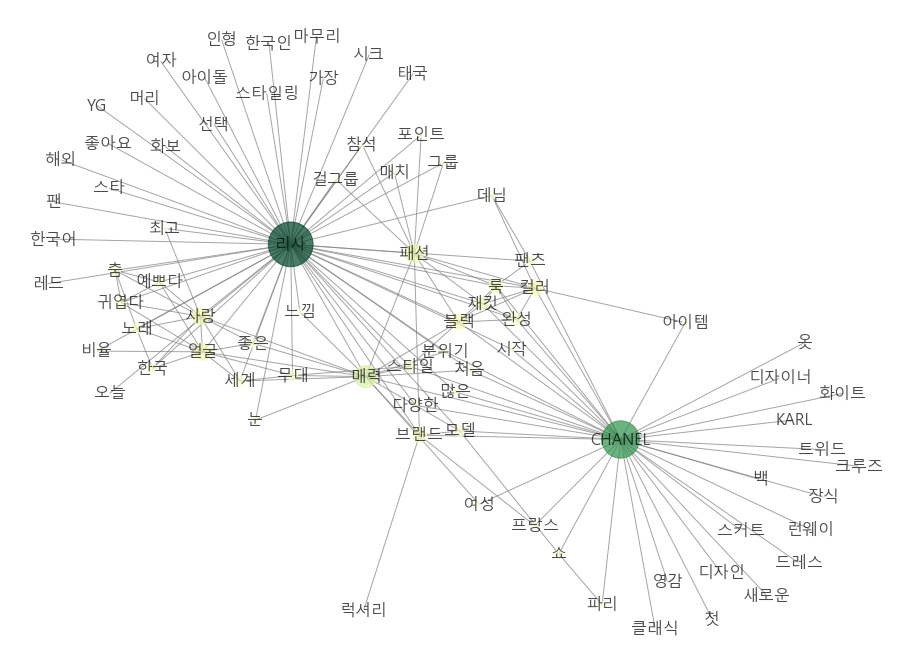

In [93]:
plt.figure(figsize = (16, 12)) ; plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 16,
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha=0.7, edge_color='.5', cmap = plt.cm.YlGn)

plt.savefig('./nt_CH7L_top500_mins06.png', bbox_inches = 'tight')
plt.show()
